#模型過度擬合問題
隨著訓練迴圈次數增加，神經網路會因為過多的訓練而過度學習，造成神經網路建立的預測模型缺乏「泛化性」，這就是過度擬合。在實務上，有時你設計、訓練出來的模型比真正需要的模型還要複雜。因此你的模型學習、記住了太多訓練資料集的雜訊，所以對於沒有看過的資料，錯誤率就會大幅上升。

## 識別出模型過度擬合
可從模型的訓練與驗證準確度與損失圖表的趨勢，辨識出是否過度擬合。

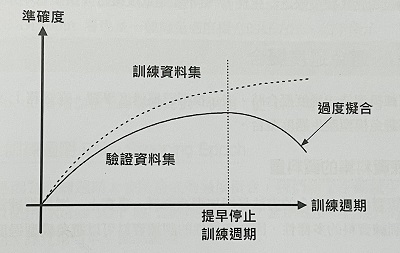

## 避免低度擬合與過度擬合
訓練模型主要就是要找出最佳化的模型參數（意即權重），除了需要避免過度擬合（模型缺乏泛化性），更不能是低度擬合（模型根本無法使用）

### 避免過度擬合的方法

1. 增加訓練資料集的資料量
2. 使用資料增強技術 Data Augmentation
3. 減少模型的複雜度
4. 使用Dropout層
5. 提早停止訓練週期 Early Stopping Epoch
6. L1和L2常規化 L1 and L2 Regularization


### L1和L2常規化 L1 and L2 Regularization
是一種權重衰減(Weight Decay)觀念，也就是懲罰權重。當模型產生過度擬合時，權重往往也會變得特別大，為了避免權重變得太大，我們可以在計算預測值和目標值的損失時，加上一個懲罰項。

假設：預測值Y'的計算是Y'=W*X，W是權重、X是訓練資料，真實目標值是Y，wd代表是權重衰減率。

L1常規化：損失 = (Y'-Y)^2 + wd*Abs(W)

L2常規化：損失 = (Y'-Y)^2 + wd*(W)^2

L1和L2常規化的差別只在最後的懲罰項。L1是權重W的絕對值，L2是權重W的平方。當權重變得太大時，乘上懲罰項wd後會加入至損失計算，會使得損失加大。而損失大，反向傳播時的權重更新調整也就會特別針對該權重。

In [ ]:
import tensorflow

import numpy as np
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers    #匯入常規化函數

In [ ]:
# 指定亂數種子
seed = 10
np.random.seed(seed)
# 載入資料集
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
# 因為是固定範圍, 所以執行正規化, 從 0-255 至 0-1
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255
# One-hot編碼
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

170508288/170498071 [==============================] - 3s 0us/step


不使用L1/L2常規化

Epoch 1/34
313/313 - 14s - loss: 1.6658 - accuracy: 0.3960 - val_loss: 1.3321 - val_accuracy: 0.5422 - 14s/epoch - 44ms/step
Epoch 2/34
313/313 - 2s - loss: 1.2888 - accuracy: 0.5407 - val_loss: 1.1781 - val_accuracy: 0.5921 - 2s/epoch - 7ms/step
Epoch 3/34
313/313 - 2s - loss: 1.1476 - accuracy: 0.5941 - val_loss: 1.0492 - val_accuracy: 0.6359 - 2s/epoch - 7ms/step
Epoch 4/34
313/313 - 2s - loss: 1.0642 - accuracy: 0.6258 - val_loss: 0.9747 - val_accuracy: 0.6622 - 2s/epoch - 7ms/step
Epoch 5/34
313/313 - 2s - loss: 0.9925 - accuracy: 0.6504 - val_loss: 0.9241 - val_accuracy: 0.6777 - 2s/epoch - 7ms/step
Epoch 6/34
313/313 - 2s - loss: 0.9300 - accuracy: 0.6718 - val_loss: 0.8756 - val_accuracy: 0.6935 - 2s/epoch - 7ms/step
Epoch 7/34
313/313 - 2s - loss: 0.8841 - accuracy: 0.6882 - val_loss: 0.8948 - val_accuracy: 0.6908 - 2s/epoch - 7ms/step
Epoch 8/34
313/313 - 2s - loss: 0.8388 - accuracy: 0.7056 - val_loss: 0.8425 - val_accuracy: 0.7104 - 2s/epoch - 7ms/step
Epoch 9/34
313/313 - 

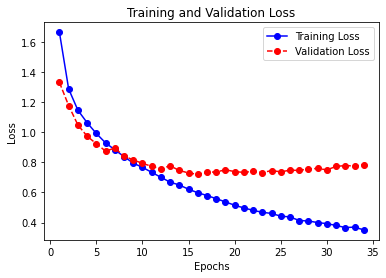

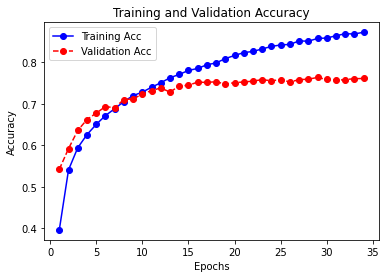

In [ ]:
# 定義模型 
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding="same", input_shape=X_train.shape[1:], activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size=(3, 3), padding="same" activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))
# 編譯模型
model.compile(loss="categorical_crossentropy", optimizer="adam",metrics=["accuracy"])
# 訓練模型
history = model.fit(X_train, Y_train, validation_split=0.2, epochs=34, batch_size=128, verbose=2)
# 評估模型
loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print("測試資料集的準確度 = {:.2f}".format(accuracy))
# 顯示圖表來分析模型的訓練過程
import matplotlib.pyplot as plt
# 顯示訓練和驗證損失
loss = history.history["loss"]
epochs = range(1, len(loss)+1)
val_loss = history.history["val_loss"]
plt.plot(epochs, loss, "bo-", label="Training Loss")
plt.plot(epochs, val_loss, "ro--", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
# 顯示訓練和驗證準確度
acc = history.history["accuracy"]
epochs = range(1, len(acc)+1)
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo-", label="Training Acc")
plt.plot(epochs, val_acc, "ro--", label="Validation Acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

使用regularizers進行L1/L2常規化

In [ ]:
# 定義模型
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding="same",
        input_shape=X_train.shape[1:], activation="relu",
        kernel_regularizer=regularizers.l2(0.02),   #在卷積層使用kernel_regularizer參數為指定損失函數的L1/L2常規化(這裡使用L2)，0.02代表權重衰減率
        bias_regularizer=regularizers.l2(0.02)))   #使用bias_regularizer參數為指定偏向量的L1/L2常規化(這裡使用L2)，0.02代表權重衰減率
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size=(3, 3), padding="same",
        activation="relu",
        kernel_regularizer=regularizers.l2(0.02),
        bias_regularizer=regularizers.l2(0.02)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))
model.summary()   # 顯示模型摘要資訊

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 8, 8, 64)          0

In [ ]:
# 編譯模型
model.compile(loss="categorical_crossentropy", optimizer="adam",
              metrics=["accuracy"])
# 訓練模型
history = model.fit(X_train, Y_train, validation_split=0.2, 
                    epochs=34, batch_size=128, verbose=2)
# 評估模型
print("\nTesting ...")
loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print("測試資料集的準確度 = {:.2f}".format(accuracy))

Epoch 1/34
313/313 - 14s - loss: 1.9775 - accuracy: 0.3534 - val_loss: 1.6105 - val_accuracy: 0.4732 - 14s/epoch - 44ms/step
Epoch 2/34
313/313 - 2s - loss: 1.5837 - accuracy: 0.4679 - val_loss: 1.4439 - val_accuracy: 0.5356 - 2s/epoch - 7ms/step
Epoch 3/34
313/313 - 2s - loss: 1.4707 - accuracy: 0.5095 - val_loss: 1.3717 - val_accuracy: 0.5626 - 2s/epoch - 7ms/step
Epoch 4/34
313/313 - 2s - loss: 1.3972 - accuracy: 0.5424 - val_loss: 1.3112 - val_accuracy: 0.5854 - 2s/epoch - 7ms/step
Epoch 5/34
313/313 - 2s - loss: 1.3416 - accuracy: 0.5620 - val_loss: 1.2487 - val_accuracy: 0.6039 - 2s/epoch - 7ms/step
Epoch 6/34
313/313 - 2s - loss: 1.2959 - accuracy: 0.5800 - val_loss: 1.2252 - val_accuracy: 0.6149 - 2s/epoch - 7ms/step
Epoch 7/34
313/313 - 2s - loss: 1.2554 - accuracy: 0.5937 - val_loss: 1.1806 - val_accuracy: 0.6292 - 2s/epoch - 7ms/step
Epoch 8/34
313/313 - 2s - loss: 1.2224 - accuracy: 0.6093 - val_loss: 1.1339 - val_accuracy: 0.6454 - 2s/epoch - 7ms/step
Epoch 9/34
313/313 - 

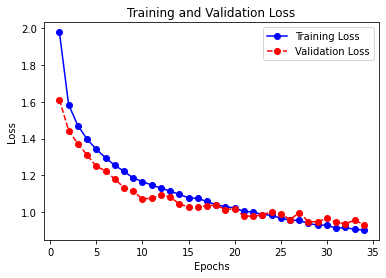

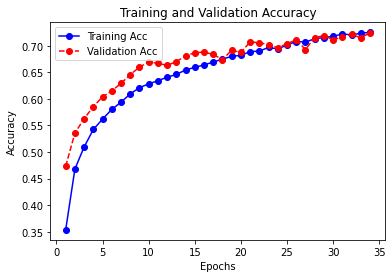

In [ ]:
# 顯示圖表來分析模型的訓練過程
import matplotlib.pyplot as plt
# 顯示訓練和驗證損失
loss = history.history["loss"]
epochs = range(1, len(loss)+1)
val_loss = history.history["val_loss"]
plt.plot(epochs, loss, "bo-", label="Training Loss")
plt.plot(epochs, val_loss, "ro--", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
# 顯示訓練和驗證準確度
acc = history.history["accuracy"]
epochs = range(1, len(acc)+1)
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo-", label="Training Acc")
plt.plot(epochs, val_acc, "ro--", label="Validation Acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### 避免低度擬合 Underfitting
低度擬合是因為訓練資料集的準確度都還很差，代表著你的模型根本還沒有學習好，還無法勝任工作。有下列幾種方式來避免：
1. 增加模型的複雜度
2. 減少Dropout層
3. 在樣本資料增加更多特徵值

**增加模型的複雜度**

訓練資料太多太大太複雜，而模型架構設計太簡單的話，會讓模型沒有足夠的能力去學習這些訓練資料。我們可以增加模型的神經層數、在每一層神經層增加神經元數、使用不同的神經層種類。

**減少Dropout層**

若有設計Dropout層，可能需要刪除過多的丟棄層，或是降低隨機歸零的比例值。

**在樣本資料增加更多特徵值**

更多樣、更多元的特徵可以幫助模型更容易學習出更好的特徵組合，更容易進行分類。例如原本只用高度和寬度的尺寸特徵來進行分類，若可以加上色彩的特徵，就能幫助模型分類的更好；預測股票價格的模型，只有使用收盤價的特徵，如果加上開盤價、盤中最高最低價和成交量等特徵，或許能幫助模型在股價預測得更好。